In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df_trnsc = pd.read_csv("./sample_data/transactions-2020-07-01-2020-09-02 (1).csv")
df_trnsc.head(2)

,Date,Time,Time Zone,Gross Sales,Discounts,Net Sales,Gift Card Sales,Tax,Tip,Partial Refunds,Total Collected,Source,Card,Card Entry Methods,Cash,Square Gift Card,Other Tender,Other Tender Type,Other Tender Note,Fees,Net Total,Transaction ID,Payment ID,Card Brand,PAN Suffix,Device Name,Staff Name,Staff ID,Details,Description,Event Type,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Device Nickname,Deposit ID,Deposit Date,Deposit Details,Fee Percentage Rate,Fee Fixed Rate,Refund Reason,Discount Name,Transaction Status
0,09/01/20,16:23:03,Mountain Time (US & Canada),US$5.25,US$0.00,US$5.25,US$0.00,US$0.33,US$0.50,US$0.00,US$6.08,Point of Sale,US$6.08,Dipped,US$0.00,US$0.00,US$0.00,NaN,NaN,US$0.23,US$5.82,XA4MBfRoR2e1dLjb6VDM6w0eV,XpZRwz4zXYgMe9iAttU0YGt7uaB,Visa,9155,SONDER,NaN,NaN,https://squareup.com/dashboard/sales/transactions/XA4MBfRoR2e1dLjb6VDM6w0eV/by-unit/7GW3QTHDACDY4,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",Payment,SONDER Coffee,NaN,JWSSS7SPBH3QSAEATPXXDJ827C,David Sutherland,NaN,NaN,3ZK06V96QCSC8YNEP9BY12E74ZE9,09/01/20,https://squareup.com/dashboard/sales/deposits/3ZK06V96QCSC8YNEP9BY12E74ZE9/by-unit/7GW3QTHDACDY4,0.022,US$0.10,NaN,NaN,Complete
1,09/01/20,16:14:40,Mountain Time (US & Canada),US$3.20,US$0.00,US$3.20,US$0.00,US$0.20,US$1.00,US$0.00,US$4.40,Point of Sale,US$4.40,Dipped,US$0.00,US$0.00,US$0.00,NaN,NaN,US$0.20,US$4.19,JN0bIrryvFDpf4UBwPLz84keV,96KKawfH4LHpBrf8nPO31yGPuaB,Visa,7434,SONDER,NaN,NaN,https://squareup.com/dashboard/sales/transactions/JN0bIrryvFDpf4UBwPLz84keV/by-unit/7GW3QTHDACDY4,Americano (16oz ICED) - double espresso over water,Payment,SONDER Coffee,NaN,FVCF4VBE090K70TQ1W5F3KF6KM,Jennie King,NaN,NaN,3ZK06V96QCSC8YNEP9BY12E74ZE9,09/01/20,https://squareup.com/dashboard/sales/deposits/3ZK06V96QCSC8YNEP9BY12E74ZE9/by-unit/7GW3QTHDACDY4,0.022,US$0.10,NaN,NaN,Complete


In [3]:
df_analysis = df_trnsc[["Date", "Time", "Time Zone", "Gross Sales", "Source", "Card Entry Methods", "Description", "Location",
                        "Customer ID", "Customer Name"]]

In [4]:
col = "Source"
df_analysis[col].name
df_analysis[col].unique().size
df_analysis[col].unique()
df_analysis[col].value_counts()

Point of Sale    6145
Online Store      335
WooCommerce        18
eGift Cards        10
Square Online       1
Name: Source, dtype: int64

In [5]:
col = "Card Entry Methods"
df_analysis[col].name
df_analysis[col].unique().size
df_analysis[col].unique()
df_analysis[col].value_counts()

Dipped     4535
Tapped     1496
Keyed       344
On File     134
Name: Card Entry Methods, dtype: int64

In [6]:
col = "Location"
df_analysis[col].name
df_analysis[col].unique().size
df_analysis[col].unique()
df_analysis[col].value_counts()

SONDER Coffee    6509
Name: Location, dtype: int64

In [7]:
# analysis on the descrption
# this is the key information that tell the ingredients consumption
col = "Description"
df_analysis[col].name
print(df_analysis[col].unique().size)
df_analysis[col].unique()
pd.DataFrame(df_analysis[col].value_counts())

2232


,Description
Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default,336
Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.,243
Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default,143
"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",122
Matcha Latte (16oz ICED) - organic pure matcha green tea with milk,105
...,...
"Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail. , Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.",1
"Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",1
"Toasted Coconut Latte (8oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default",1
"Cortado (Regular) - double espresso with two ounces of steamed milk, Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default",1


In [8]:
# is null check
df_analysis[df_analysis["Description"].isnull()]


,Date,Time,Time Zone,Gross Sales,Source,Card Entry Methods,Description,Location,Customer ID,Customer Name
6452,07/01/20,13:48:05,Mountain Time (US & Canada),US$0.00,Point of Sale,Dipped,NaN,SONDER Coffee,NaN,NaN
6509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# safe to dropna
df_dropna = df_analysis.dropna()

In [10]:
df_desc = df_dropna[["Gross Sales", "Description"]]
df_desc["split"] = df_desc["Description"].str.split('-').apply(lambda x: [e.strip() for e in x])
df_desc["name"] = df_desc["split"].apply(lambda x: x[0])
df_desc.head()

<ipython-input-10-f2cfd7678107>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc["split"] = df_desc["Description"].str.split('-').apply(lambda x: [e.strip() for e in x])
<ipython-input-10-f2cfd7678107>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc["name"] = df_desc["split"].apply(lambda x: x[0])


,Gross Sales,Description,split,name
0,US$5.25,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default","[Toasted Coconut Latte (16oz ICED), beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default]",Toasted Coconut Latte (16oz ICED)
1,US$3.20,Americano (16oz ICED) - double espresso over water,"[Americano (16oz ICED), double espresso over water]",Americano (16oz ICED)
2,US$5.00,"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.","[Golden Coast (12oz ICED), pineapple, rum, coconut milk cold brew mocktail. dairy free by default.]",Golden Coast (12oz ICED)
3,US$5.70,Matcha Latte (16oz ICED) - organic pure matcha green tea with milk,"[Matcha Latte (16oz ICED), organic pure matcha green tea with milk]",Matcha Latte (16oz ICED)
4,US$9.00,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap.","[Matcha Mango Mojito (12oz ICED), mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med, 12oz), currently our earl grey house brewed iced tea on tap.]",Matcha Mango Mojito (12oz ICED)


In [11]:
# simple analysis on drink sold (name)
col = "name"
df_desc[col].name
print(f'number of different driknk: {df_desc[col].unique().size}')
# df_analysis[col].unique()
df_desc[col].value_counts()

number of different driknk: 583


Latte (16oz ICED)                                                                 639
Nitro Coldbrew (16oz)                                                             389
Latte (12oz HOT)                                                                  302
Toasted Coconut Latte (16oz ICED)                                                 208
Latte (16oz HOT (quad shot))                                                      206
                                                                                 ... 
RWANDA | Gihanga (Regular), Guatemala | Finca La Union (Regular)                    1
2 x Espresso Tonic or Soda (Regular), Butter / Plain Croissant (Regular Price)      1
Savory Croissant (Regular), Nitro Coldbrew (16oz)                                   1
2 x Savory Croissant (Regular), 2 x Latte (8oz HOT)                                 1
3 x Filled Croissant (Regular), Savory Croissant (Regular)                          1
Name: name, Length: 583, dtype: int64

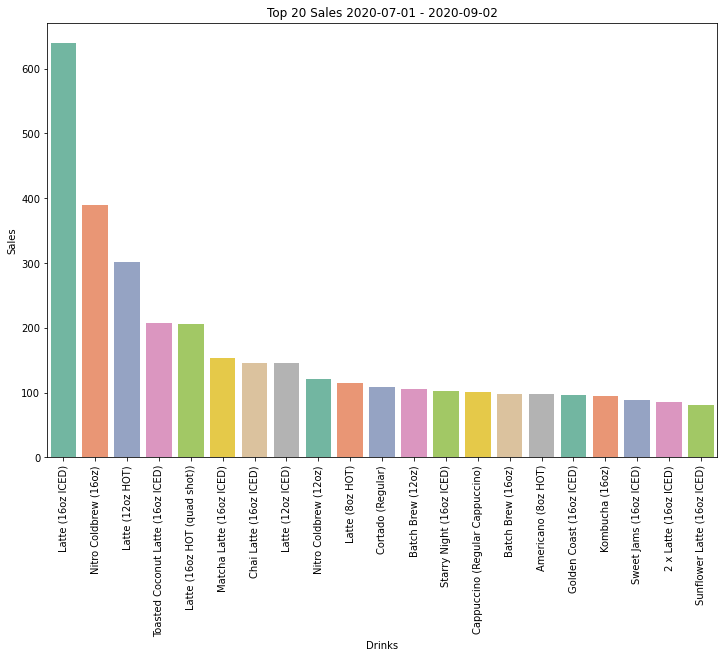

In [12]:
# visualization (top 20 sales)
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(4*3,8), )
plt.xticks(rotation=90)
df_tmp = pd.DataFrame(df_desc[col].value_counts()).reset_index()
fig = sns.barplot(x = "index", y = "name", data=df_tmp.loc[:20,:], 
                  palette=sns.color_palette("Set2"),
                  ax = ax)\
    .set(title='Top 20 Sales 2020-07-01 - 2020-09-02', xlabel='Drinks', ylabel='Sales')

In [13]:
# realized one transaction might include several items.
# e.g., Savory Croissant (Regular), Latte (16oz ICED)
# so, we need to sepreate them


In [14]:
df_desc["multi"] = df_desc["name"].str.split(',').apply(lambda x: [e.strip() for e in x])
# df_tmp = df_desc["multi"].apply(lambda x: len(x))
# df_desc[df_tmp.sort_values(ascending=False)>1]
df_desc[df_desc["multi"].apply(lambda x: len(x)) >1]

<ipython-input-14-bb1bf9f8b305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc["multi"] = df_desc["name"].str.split(',').apply(lambda x: [e.strip() for e in x])


,Gross Sales,Description,split,name,multi
21,US$10.20,"Savory Croissant (Regular), Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default","[Savory Croissant (Regular), Latte (16oz ICED), double espresso with milk // 16oz HOT lattes come with four shots by default]","Savory Croissant (Regular), Latte (16oz ICED)","[Savory Croissant (Regular), Latte (16oz ICED)]"
48,US$16.40,"Quiche (Regular), Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.","[Quiche (Regular), Latte (16oz ICED), double espresso with milk // 16oz HOT lattes come with four shots by default \n, Nitro Coldbrew (16oz), on tap nitro cold brew: creamy and chocolatey ethiopia.]","Quiche (Regular), Latte (16oz ICED)","[Quiche (Regular), Latte (16oz ICED)]"
49,US$10.50,"Danish (Regular), Summer Meadow (16oz ICED) - a strawberry chamomile sparkling matcha. // dairy free by default.","[Danish (Regular), Summer Meadow (16oz ICED), a strawberry chamomile sparkling matcha. // dairy free by default.]","Danish (Regular), Summer Meadow (16oz ICED)","[Danish (Regular), Summer Meadow (16oz ICED)]"
50,US$12.50,"Quiche (Regular), Savory Croissant (Regular)","[Quiche (Regular), Savory Croissant (Regular)]","Quiche (Regular), Savory Croissant (Regular)","[Quiche (Regular), Savory Croissant (Regular)]"
71,US$14.40,"Danish (Regular), Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default","[Danish (Regular), Latte (16oz ICED), double espresso with milk // 16oz HOT lattes come with four shots by default \n, Latte (16oz ICED), double espresso with milk // 16oz HOT lattes come with four shots by default]","Danish (Regular), Latte (16oz ICED)","[Danish (Regular), Latte (16oz ICED)]"
...,...,...,...,...,...
6449,US$10.00,"Grapefruit Rosemary Cold Brew (16OZ), Lemonade- Flavored (Large- 16oz)","[Grapefruit Rosemary Cold Brew (16OZ), Lemonade, Flavored (Large, 16oz)]","Grapefruit Rosemary Cold Brew (16OZ), Lemonade","[Grapefruit Rosemary Cold Brew (16OZ), Lemonade]"
6468,US$10.45,"Orange Blossom Latte (16oz ICED), Matcha Latte (16oz ICED) - organic pure matcha green tea with milk","[Orange Blossom Latte (16oz ICED), Matcha Latte (16oz ICED), organic pure matcha green tea with milk]","Orange Blossom Latte (16oz ICED), Matcha Latte (16oz ICED)","[Orange Blossom Latte (16oz ICED), Matcha Latte (16oz ICED)]"
6483,US$9.50,"Danish (Regular), Cocoa (large (16oz)) - steamed milk ft. our chocolate ganache","[Danish (Regular), Cocoa (large (16oz)), steamed milk ft. our chocolate ganache]","Danish (Regular), Cocoa (large (16oz))","[Danish (Regular), Cocoa (large (16oz))]"
6490,US$14.00,"2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)","[2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)]","2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)","[2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)]"


In [15]:
# unstack the "multi" colmn list
# e.g., [latte, Americano] will be unstacked into two rows
import numpy as np
lst_col = 'multi'
df = df_desc
df_unstack = pd.DataFrame({
        col:np.repeat(df[col].values, df[lst_col].str.len())
        for col in df.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]
df_unstack.head()

,Gross Sales,Description,split,name,multi
0,US$5.25,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default","[Toasted Coconut Latte (16oz ICED), beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default]",Toasted Coconut Latte (16oz ICED),Toasted Coconut Latte (16oz ICED)
1,US$3.20,Americano (16oz ICED) - double espresso over water,"[Americano (16oz ICED), double espresso over water]",Americano (16oz ICED),Americano (16oz ICED)
2,US$5.00,"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.","[Golden Coast (12oz ICED), pineapple, rum, coconut milk cold brew mocktail. dairy free by default.]",Golden Coast (12oz ICED),Golden Coast (12oz ICED)
3,US$5.70,Matcha Latte (16oz ICED) - organic pure matcha green tea with milk,"[Matcha Latte (16oz ICED), organic pure matcha green tea with milk]",Matcha Latte (16oz ICED),Matcha Latte (16oz ICED)
4,US$9.00,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap.","[Matcha Mango Mojito (12oz ICED), mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med, 12oz), currently our earl grey house brewed iced tea on tap.]",Matcha Mango Mojito (12oz ICED),Matcha Mango Mojito (12oz ICED)


In [16]:
# # test case: unstack dataframe
# df = pd.DataFrame({
#     "a" : [1,2,3],
#     "b" : [[1,2],[2,3,4],[5]],
#     "c" : [5,6,7]
# })
# df

# import numpy as np
# pd.DataFrame({'a':np.repeat(df.a.values, df.b.str.len()),
#                         'b':np.concatenate(df.b.values)})

# lst_col = 'b'
# pd.DataFrame({
#         col:np.repeat(df[col].values, df[lst_col].str.len())
#         for col in df.columns.difference([lst_col])
#     }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [17]:
# simple analysis on drink sold (name)
col = "multi"
df_unstack[col].name
print(f'number of different driknk: {df_unstack[col].unique().size}')
# df_analysis[col].unique()
df_unstack[col].value_counts()

number of different driknk: 263


Latte (16oz ICED)                          692
Nitro Coldbrew (16oz)                      413
Latte (12oz HOT)                           319
Latte (16oz HOT (quad shot))               226
Toasted Coconut Latte (16oz ICED)          211
                                          ... 
2 x Double Filling Croissant  (Regular)      1
SONDER Cap (Regular)                         1
Sweet Jams (12oz)                            1
3 x Americano (16oz ICED)                    1
2 x Honey Pistachio Cold Brew (12OZ)         1
Name: multi, Length: 263, dtype: int64

In [18]:
# another issue immediately revealed is the 2 x 
# e.g., [2 x Americano] should be [Americano, Americano]
df_desc[df_desc.Description.str.contains("Americano \(8oz HOT\) ")][["Gross Sales", 'Description', "multi"]]

,Gross Sales,Description,multi
11,US$6.40,2 x Americano (8oz HOT) - double espresso over water,[2 x Americano (8oz HOT)]
55,US$6.80,"Cortado (Regular) - double espresso with two ounces of steamed milk, Americano (8oz HOT) - double espresso over water",[Cortado (Regular)]
142,US$7.20,"Americano (8oz HOT) - double espresso over water , Botanical- Patagonia Superberry (12oz HOT)",[Americano (8oz HOT)]
177,US$12.60,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai. , Americano (8oz HOT) - double espresso over water",[Latte (16oz ICED)]
201,US$8.70,"Americano (8oz HOT) - double espresso over water , Matcha Mango Mojito (16oz ICED) - mango, matcha, mint and bubbles. // dairy free by default",[Americano (8oz HOT)]
...,...,...,...
6224,US$19.10,"Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness., Cortado (Regular) - double espresso with two ounces of steamed milk, Americano (8oz HOT) - double espresso over water , Lemonade- Flavored (Med- 12oz), Danish (Regular)",[Cappuccino (Regular Cappuccino)]
6227,US$7.00,"Flat White (Regular) - double shot with four ounces of milk, low foam and crema forward, Americano (8oz HOT) - double espresso over water",[Flat White (Regular)]
6277,US$3.20,Americano (8oz HOT) - double espresso over water,[Americano (8oz HOT)]
6337,US$15.65,"Chai Latte (12oz HOT) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai. , Americano (8oz HOT) - double espresso over water , Quiche (Regular)",[Chai Latte (12oz HOT)]


In [19]:
# reformat the 2 x expression (using reg)
import re
df_desc[df_desc.Description.str.contains(r"([0-9]) x ")][["Gross Sales", 'Description', "multi"]]

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Gross Sales,Description,multi
11,US$6.40,2 x Americano (8oz HOT) - double espresso over water,[2 x Americano (8oz HOT)]
18,US$7.60,"2 x Flat White (Regular) - double shot with four ounces of milk, low foam and crema forward",[2 x Flat White (Regular)]
36,US$4.50,2 x Perrier/Fiji (Regular Price),[2 x Perrier/Fiji (Regular Price)]
39,US$8.40,2 x Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default,[2 x Latte (16oz ICED)]
56,US$7.50,"2 x Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus",[2 x Batch Brew (16oz)]
...,...,...,...
6490,US$14.00,"2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)","[2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)]"
6497,US$19.40,"2 x Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Savory Croissant (Regular), Double Filling Croissant (Regular)",[2 x Latte (16oz ICED)]
6498,US$12.60,"2 x Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia. , Americano (12oz HOT) - double espresso over water",[2 x Nitro Coldbrew (16oz)]
6501,US$9.00,2 x Danish (Regular),[2 x Danish (Regular)]


In [101]:
# reformat the 2 x expression (using reg)
# define the seperate function

import re
multi = ["2 x Americano (8oz HOT)"]
# multi = ["Americano (8oz HOT)"]
def seperat_num_x(multi):
#     number_x = re.match(r"[0-9] x ", multi)
    if (re.match(r"[0-9] x ", multi)):
        num_x_item = [e.strip() for e in multi.split(" x ")]
        return [num_x_item[1]] * int(num_x_item[0])
    else: return multi
result = seperat_num_x(multi)
result

AttributeError: 'list' object has no attribute 'split'

In [103]:
multi = ["2 x Americano (8oz HOT)"]
multi[0]

'2 x Americano (8oz HOT)'

In [21]:
df_unstack["seperate"] = df_unstack.multi.apply(lambda x: seperat_num_x(x))
df_unstack[df_unstack.Description.str.contains(r"([0-9]) x ")]

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Gross Sales,Description,split,name,multi,seperate
11,US$6.40,2 x Americano (8oz HOT) - double espresso over water,"[2 x Americano (8oz HOT), double espresso over water]",2 x Americano (8oz HOT),2 x Americano (8oz HOT),"[Americano (8oz HOT), Americano (8oz HOT)]"
18,US$7.60,"2 x Flat White (Regular) - double shot with four ounces of milk, low foam and crema forward","[2 x Flat White (Regular), double shot with four ounces of milk, low foam and crema forward]",2 x Flat White (Regular),2 x Flat White (Regular),"[Flat White (Regular), Flat White (Regular)]"
34,US$4.50,2 x Perrier/Fiji (Regular Price),[2 x Perrier/Fiji (Regular Price)],2 x Perrier/Fiji (Regular Price),2 x Perrier/Fiji (Regular Price),"[Perrier/Fiji (Regular Price), Perrier/Fiji (Regular Price)]"
37,US$8.40,2 x Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default,"[2 x Latte (16oz ICED), double espresso with milk // 16oz HOT lattes come with four shots by default]",2 x Latte (16oz ICED),2 x Latte (16oz ICED),"[Latte (16oz ICED), Latte (16oz ICED)]"
57,US$7.50,"2 x Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus","[2 x Batch Brew (16oz), single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus]",2 x Batch Brew (16oz),2 x Batch Brew (16oz),"[Batch Brew (16oz), Batch Brew (16oz)]"
...,...,...,...,...,...,...
6748,US$14.00,"2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)","[2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)]","2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)",Double Filling Croissant (Regular),Double Filling Croissant (Regular)
6756,US$19.40,"2 x Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Savory Croissant (Regular), Double Filling Croissant (Regular)","[2 x Latte (16oz ICED), double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Savory Croissant (Regular), Double Filling Croissant (Regular)]",2 x Latte (16oz ICED),2 x Latte (16oz ICED),"[Latte (16oz ICED), Latte (16oz ICED)]"
6757,US$12.60,"2 x Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia. , Americano (12oz HOT) - double espresso over water","[2 x Nitro Coldbrew (16oz), on tap nitro cold brew: creamy and chocolatey ethiopia. , Americano (12oz HOT), double espresso over water]",2 x Nitro Coldbrew (16oz),2 x Nitro Coldbrew (16oz),"[Nitro Coldbrew (16oz), Nitro Coldbrew (16oz)]"
6759,US$9.00,2 x Danish (Regular),[2 x Danish (Regular)],2 x Danish (Regular),2 x Danish (Regular),"[Danish (Regular), Danish (Regular)]"


In [22]:
# wrap it up

In [23]:
# dropna (change later)
df_dropna = df_trnsc[df_trnsc.Description.notna()][["Description"]]
df_dropna.head()

# extract item name (before "-", include multiples)
# df_dropna.apply

,Description
0,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
1,Americano (16oz ICED) - double espresso over water
2,"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
3,Matcha Latte (16oz ICED) - organic pure matcha green tea with milk
4,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."


In [24]:
df_dropna.count()

Description    6508
dtype: int64

In [25]:
# 3068 contain "//" out of 6508
df_dropna[df_dropna.Description.str.contains("//")==True].count()
df_dropna[df_dropna.Description.str.contains("//")==True].head()

# 6085 contain "-" out of 6508
df_dropna[df_dropna.Description.str.contains("-")==True].count()
df_dropna[df_dropna.Description.str.contains("-")==True].head()

# 6407 contain "()" out of 6508
df_dropna[df_dropna.Description.str.contains("\(")==True].count()
df_dropna[df_dropna.Description.str.contains("\(")==True].head()

,Description
0,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
1,Americano (16oz ICED) - double espresso over water
2,"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
3,Matcha Latte (16oz ICED) - organic pure matcha green tea with milk
4,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."


In [26]:
df_dropna[df_dropna.Description.str.contains("\(")==True].count()

Description    6467
dtype: int64

In [27]:
# preview on records doesn't contain ()
# looks like these are special items
df_dropna[df_dropna.Description.str.contains("\(")==False]

,Description
58,Custom Amount
97,"2 x Single Origin One Coffee Bag Subscription, Free shipping"
111,eGift Card
277,Custom Amount
795,"SONDER Embroidered Tees - M, Pineapple, Origin Burlap Tote | Guatemala, Free shipping"
895,"Single Origin Coffee Subscription, Free shipping"
959,Custom Amount
1630,eGift Card
2036,eGift Card
2091,"Single Origin Coffee Subscription, Free shipping"


In [28]:
df_dropna[(df_dropna.Description.str.contains("\(")==True) &\
         (df_dropna.Description.str.contains("-")==False)]

,Description
27,Savory Croissant (Regular)
30,Savory Croissant (Regular)
36,2 x Perrier/Fiji (Regular Price)
50,"Quiche (Regular), Savory Croissant (Regular)"
77,"Honduras | Finca Los Olivos (Regular), Guatemala | Finca La Union (Regular)"
...,...
6478,Butter / Plain Croissant (Regular Price)
6481,Honey Pistachio Cold Brew (12OZ)
6482,Orange Blossom Latte (16oz HOT (quad shot))
6490,"2 x Almond Croissant (Regular Price), Double Filling Croissant (Regular)"


In [29]:
df_dropna[(df_dropna.Description.str.contains("\(")==True) &\
         (df_dropna.Description.str.contains("-")==False)].head(20)

,Description
27,Savory Croissant (Regular)
30,Savory Croissant (Regular)
36,2 x Perrier/Fiji (Regular Price)
50,"Quiche (Regular), Savory Croissant (Regular)"
77,"Honduras | Finca Los Olivos (Regular), Guatemala | Finca La Union (Regular)"
96,Almond Croissant (Regular Price)
101,Honduras | Finca Los Olivos (Regular)
119,Yama Cold Brew (Single Origin) (16oz)
158,"Gift Card, Hydro Flask (16oz) (Regular Price)"
198,Danish (Regular)


In [30]:
# !!!! THIS IS A BIG PROBLEM AND CANNOT RESOLVE SO FAR.
# ...

In [31]:
# if focus on the major items (those with "-" symbols)
df_dropna.Description.apply(lambda x: re.subn(" - ", '', x)[1])
df_dropna[df_dropna.Description.apply(lambda x: re.subn(" - ", '', x)[1])>1]

,Description
4,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."
9,"Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
13,"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness."
15,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default"
19,"2 x Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, 2 x SONDER Sticker (Regular) - SONDER Merch Stickers"
...,...
6493,"Guatemala | Finca La Union (Regular), Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus"
6496,"Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Americano (16oz HOT (quad shot)) - double espresso over water , Savory Croissant (Regular)"
6498,"2 x Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia. , Americano (12oz HOT) - double espresso over water"
6507,"Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia. , Cortado (Regular) - double espresso with two ounces of steamed milk"


In [32]:
thestring = "Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
re.subn("16", '', thestring)[1]

2

In [33]:
df_dropna[(df_dropna.Description.str.contains("16oz HOT lattes come with four shots by default "))]

,Description
15,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default"
19,"2 x Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, 2 x SONDER Sticker (Regular) - SONDER Merch Stickers"
34,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Butter / Plain Croissant (Regular Price)"
48,"Quiche (Regular), Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia."
52,"Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Batch Brew (12oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus"
...,...
4996,"Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Almond Croissant (Regular Price)"
5009,"Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default"
5011,"2 x Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, 2 x Danish (Regular)"
5013,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Danish (Regular), Masks (Regular Mask)"


In [34]:
df_dropna[(df_dropna.Description.str.contains("caffeine free and a splash of cream by default,"))]


,Description
14,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
68,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Sunflower Latte (16oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default"
84,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Matcha Mango Mojito (16oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default. , Botanical- Chamomile Medley (16oz ICED)"
204,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
215,"Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai. , Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
...,...
4934,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
4941,"Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default. , Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
4946,"Sunflower Latte (12oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default, Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Savory Croissant (Regular), Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
4984,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail. , Almond Croissant (Regular Price)"


In [35]:
df_dropna[(df_dropna.Description.str.contains("Starry Night \(16oz ICED\) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"))]


,Description
14,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
68,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Sunflower Latte (16oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default"
84,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Matcha Mango Mojito (16oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default. , Botanical- Chamomile Medley (16oz ICED)"
204,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
215,"Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai. , Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
...,...
4842,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
4926,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Firecracker (16oz ICED) - spicy jalapeno and mango citrus cold brew mocktail. dairy free by default."
4927,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
4932,"Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail."


In [36]:
df_dropna[(df_dropna.Description.str.contains("caffeine free and a splash of cream by default,")==True) &\
         (df_dropna.Description.str.contains("Starry Night \(16oz ICED\) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise")==False)]

,Description
335,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
338,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
351,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
452,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
798,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
844,"Cocoa (medium (12oz)) - steamed milk ft. our chocolate ganache , Chai Latte (12oz HOT) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai. , Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Sunflower Latte (16oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default, Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
874,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
961,"Guatemala | Finca La Union (Regular), Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"
1100,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, 2 x Summer Meadow (16oz ICED) - a strawberry chamomile sparkling matcha. // dairy free by default. , Espresso (Regular) - single-origin Colombia ""double shot"" espresso., RWANDA | Gihanga (Regular)"
1197,"Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise"


In [37]:
df_dropna[(df_dropna.Description.str.contains("// caffeine free and a splash of cream by default,")==False) &\
         (df_dropna.Description.str.contains("//")==True)]

,Description
0,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
4,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."
5,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
6,Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default
9,"Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
...,...
6500,Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6502,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6504,2 x Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6505,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default


In [38]:
df_dropna[(df_dropna.Description.str.contains("// caffeine free and a splash of cream by default,")==False) &\
          (df_dropna.Description.str.contains("// dairy free by default")==False) &\
         (df_dropna.Description.str.contains("//")==True)]

,Description
0,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
5,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
6,Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default
9,"Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
12,"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
...,...
6500,Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6502,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6504,2 x Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6505,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default


In [39]:

df_dropna[(df_dropna.Description.str.contains("// 16oz HOT lattes come with four shots by default"))].count()
df_dropna[(df_dropna.Description.str.contains("16oz HOT lattes come with four shots by default"))].count()

Description    2205
dtype: int64

In [40]:
# YAY, this is what I need
# maybe
df_dropna[(df_dropna.Description.str.contains("\. // "))]

df_dropna[(df_dropna.Description.str.contains("\. // ")==False) &\
         (df_dropna.Description.str.contains(" // ")==True)]

# not there yet

# finally
df_dropna[
    (df_dropna.Description.str.contains("\. // ")==False) &\
          (df_dropna.Description.str.contains(r"// 16oz LARGE|HOT lattes come with four ")==False) &\
         (df_dropna.Description.str.contains(" // ")==True)]

# It turns out // is not even a serpator ;(

,Description


In [41]:
# if focus on the major items (those with "-", "()", and // symbols)
# df_dropna.Description.apply(lambda x: re.subn(" - ", '', x)[1])
df_dropna[(df_dropna.Description.apply(lambda x: re.subn(" - ", '', x)[1])>1 ) |\
         (df_dropna.Description.apply(lambda x: re.subn(" // ", '', x)[1])>1 ) |\
         (df_dropna.Description.apply(lambda x: re.subn("\(", '', x)[1])>1 )]

,Description
4,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."
9,"Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
13,"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness."
15,"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default"
19,"2 x Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, 2 x SONDER Sticker (Regular) - SONDER Merch Stickers"
...,...
6498,"2 x Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia. , Americano (12oz HOT) - double espresso over water"
6502,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6505,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6507,"Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia. , Cortado (Regular) - double espresso with two ounces of steamed milk"


In [42]:
# FINALLY, this is my savior "\n" and " , " and " // "
# maybe
df_dropna[(df_dropna.Description.str.contains("\\n, ")==True) ]
df_dropna[(df_dropna.Description.str.contains("\\n, ")==False) ]

df_tmp = pd.DataFrame(df_dropna[(df_dropna.Description.str.contains("\\n, ")==False) &\
                                (df_dropna.Description.str.contains(" , ")==False) &\
                                (df_dropna.Description.str.contains(" // ")==False)
                               ].value_counts()).reset_index()
df_tmp.columns = ["x", "y"]
df_tmp[df_tmp["y"].between(2,5)].tail(20)

,x,y
165,"Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness., Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.",2
166,"Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness., Matcha Latte (8oz HOT) - organic pure matcha green tea with milk",2
167,"Golden Coast (16oz cold) - Pineapple, rum, and coconut milk cold brew mocktail.",2
168,"Grapefruit Rosemary Cold Brew (16OZ), Lemonade- Flavored (Large- 16oz)",2
169,"2 x COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness.",2
170,2 x SONDER Sticker (Regular) - SONDER Merch Stickers,2
171,Botanical- Chamomile Medley (12oz HOT),2
172,"Almond Croissant (Regular Price), Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail.",2
173,2 x Almond Croissant (Regular Price),2
174,"Savory Croissant (Regular), Cortado (Regular) - double espresso with two ounces of steamed milk",2


In [43]:
df_dropna[(df_dropna.Description.str.contains("\\n, ")==False) &\
                                (df_dropna.Description.str.contains(" , ")==False)]

,Description
0,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
1,Americano (16oz ICED) - double espresso over water
2,"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
3,Matcha Latte (16oz ICED) - organic pure matcha green tea with milk
4,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."
...,...
6503,Kombucha (16oz) - rotating flavor of on tap kombucha
6504,2 x Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6505,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default
6506,"Batch Brew (8oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus"


In [44]:
# Let's try a different approach
# 0. notice the "," or "\\n," is still the seperator
# 1. pick out description without "," (single item)
# 2. split by ",", then try to find out patern about the splits
# e.g., the useful item name should be long enough to provide info

df_dropna[(df_dropna.Description.str.contains(",")==False)].value_counts()

Description                                                                                                
Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default               336
Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.                                243
Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default                143
Matcha Latte (16oz ICED) - organic pure matcha green tea with milk                                             105
Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default    100
                                                                                                              ... 
Green- Houjicha (16oz HOT)                                                                                       1
White Tea Rose Melange (Regular)                                                       

In [45]:
# 1. pick out description without "," (single item)
item_list = df_dropna[(df_dropna.Description.str.contains(",")==False)].value_counts().reset_index()

# handle the "2 x"
item_list[item_list.Description.str.contains(r'([0-9]*)[0-9] x ') ==True]


def seperat_num_x(multi, return_single=False):
#     number_x = re.match(r"[0-9] x ", multi)
    if (re.match(r"([0-9]*)[0-9] x ", multi)):
        num_x_item = [e.strip() for e in multi.split(" x ")]
        if return_single:
            return num_x_item[1]
        else: return [num_x_item[1]] * int(num_x_item[0])
    else: return multi
    
item_list[item_list.Description.str.contains(r'([0-9]*)[0-9] x ') ==True]\
.Description.apply(lambda x: seperat_num_x(x,True))\
.to_frame().head()

item_list_nocommma = item_list.Description.apply(lambda x: seperat_num_x(x,True))\
.value_counts()\
.reset_index()['index'].values
print(item_list_nocommma.size)
pd.DataFrame(item_list_nocommma).head()

133


/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
0,Kombucha (16oz) - rotating flavor of on tap kombucha
1,SONDER Sticker (Regular) - SONDER Merch Stickers
2,Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default
3,Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default
4,Latte (12oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default


In [46]:
df_iscomma = df_dropna[(df_dropna.Description.str.contains(",")==True)].Description\
.to_frame().reset_index(drop=True)
#.apply(lambda x: [e.strip() for e in x.split(",")])
# .to_frame().reset_index()
df_iscomma.head()
# df_iscomma[df_iscomma.Description.str.contains('|'.join(item_list_nocommma))==True]

,Description
0,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
1,"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."
2,"Matcha Mango Mojito (12oz ICED) - mango, matcha, mint and bubbles. // dairy free by default, On Tap Iced Tea (Med- 12oz) - currently our earl grey house brewed iced tea on tap."
3,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default"
4,"Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default."


In [47]:
# notice there are items with commas mixed with items without 
df_iscomma[(df_iscomma.Description.str.contains("|".join(item_list_nocommma))==True)].value_counts().to_frame()

# df_iscomma.Description.apply(lambda x: [e.strip() if not e in(item_list_nocommma) else e for e in x.split(",") ])
df_iscomma.Description.apply(lambda x: [e.strip() for e in x.split(",") if not e in(item_list_nocommma)])\
.value_counts().to_frame()

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Description
"[Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default]",124
"[Chai Latte (16oz ICED) - chai lattes using sanctuary chai tea concentrate. no sugar, sweetened with honey. choose between the traditional, spicy, or decaf herbal chai.]",105
"[Batch Brew (12oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus]",86
"[Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness.]",76
"[Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus]",69
...,...
"[Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise, Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail., Quiche (Regular)]",1
"[Batch Brew (12oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus, Filled Croissant (Regular)]",1
"[China Breakfast (Regular), Guatemala | Finca La Union (Regular)]",1
"[Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia., Matcha Mango Mojito (16oz ICED) - mango, matcha, mint and bubbles. // dairy free by default]",1


In [97]:
# this block try to find out non-essential partial item name seperated by ","
# think about this as finding stop-word
# the key idea is essential names include following symbols
# " - ", "\|", "\(", "Regular"
df_tmp = df_iscomma.Description.apply(lambda x: [e.strip() for e in x.split(",") if not e in(item_list_nocommma)])\
.value_counts().reset_index()
df_tmp['index'][0]

lst_col = 'index'
df = df_tmp[['index']]
df_unstack = pd.DataFrame({
        col:np.repeat(df[col].values, df[lst_col].str.len())
        for col in df.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]
df_unstack.head()
df_unstack[(\
#     df_unstack['index'].str.contains(' // ') |\
    df_unstack['index'].str.contains(' - ') |\
    df_unstack['index'].str.contains('\|') |\
    df_unstack['index'].str.contains('\(') |\
    df_unstack['index'].str.contains('Regular') |\
    df_unstack['index'].str.contains('Coffee Bag Subscription') |\
    df_unstack['index'].str.contains('Single Origin Coffee Subscription') |\
    df_unstack['index'].str.contains('STAY COZY Mug') \
           )==False
          ].value_counts().to_frame()

list_stopword = df_unstack[(
#     df_unstack['index'].str.contains(' // ') |\
    df_unstack['index'].str.contains(' - ') |\
    df_unstack['index'].str.contains('\|') |\
    df_unstack['index'].str.contains('\(') |\
    df_unstack['index'].str.contains('Regular') |\
    df_unstack['index'].str.contains('Coffee Bag Subscription') |\
    df_unstack['index'].str.contains('Single Origin Coffee Subscription') |\
    df_unstack['index'].str.contains('STAY COZY Mug') \
           )==False
          ]['index'].unique()
list_stopword

array(['summery',
       'poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default',
       'sweetened with honey. choose between the traditional', 'spicy',
       'or decaf herbal chai.', 'sweet fruit and spiced citrus',
       'slight foam and lower temperature and steamed for sweetness.',
       'rum', 'coconut milk cold brew mocktail. dairy free by default.',
       'lavender and blueberry cream soda. // caffeine free and a splash of cream by default',
       'request a plant milk otherwise', 'earthy',
       'sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default',
       'matcha', 'mint and bubbles. // dairy free by default',
       'with in-husk fermentation for up to 24 hours',
       'dry-mass fermentations from 12 to 36 hours',
       'and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup',
       'with notes of chocolate', 'vanilla', 'and dried fruit',
   

In [87]:
df_dropna[df_dropna.Description.str.contains('<br /><br />')]


,Description
173,"Honduras | Finca Los Olivos (Regular), COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness."
174,"COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness. , RWANDA | Gihanga (Regular)"
270,"COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness. , Quiche (Regular)"
292,"COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness."
443,"Guatemala | Finca La Union (Regular), COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness. , Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Beach Bum (16oz ICED) - Cold brew with our brown-sugar-rum syrup and a splash of cream."
...,...
6064,"Honey Pistachio Cold Brew (16OZ), COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness."
6113,"COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed process, with in-husk fermentation for up to 24 hours, dry-mass fermentations from 12 to 36 hours, and was mix homogenized in the density sorter. <br /><br />Resulting is a sweet and nutty cup, with notes of chocolate, vanilla, and dried fruit, pecan and hazelnut, and subtle citrus brightness. , Honey Pistachio Cold Brew (12OZ)"
6148,"COLOMBIA | Los Ventenos (Regular) - pecan | vanilla | dried fruit<br /><br />This is a regional selection of lots from nineteen notable caficultores from La Unión. It involves a washed

In [88]:
df_dropna[df_dropna.Description.str.contains('Regular')]

,Description
13,"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness."
18,"2 x Flat White (Regular) - double shot with four ounces of milk, low foam and crema forward"
19,"2 x Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, 2 x SONDER Sticker (Regular) - SONDER Merch Stickers"
20,"Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness."
21,"Savory Croissant (Regular), Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default"
...,...
6493,"Guatemala | Finca La Union (Regular), Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus"
6496,"Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Americano (16oz HOT (quad shot)) - double espresso over water , Savory Croissant (Regular)"
6497,"2 x Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default \n, Savory Croissant (Regular), Double Filling Croissant (Regular)"
6501,2 x Danish (Regular)


In [89]:

df_unstack[df_unstack['index'].str.contains('Regular')].value_counts().to_frame().head(50)

,0
index,
Danish (Regular),143
Quiche (Regular),88
Almond Croissant (Regular Price),71
Filled Croissant (Regular),70
Cappuccino (Regular Cappuccino) - double shot with four ounces of milk,69
Butter / Plain Croissant (Regular Price),67
Savory Croissant (Regular),47
Flat White (Regular) - double shot with four ounces of milk,42
Cortado (Regular) - double espresso with two ounces of steamed milk,38


In [50]:
item_list = df_dropna[(df_dropna.Description.str.contains(",")==False)].value_counts()\
.reset_index().Description.values
df_dropna[(df_dropna.Description.apply(lambda x: re.subn(", ", '', x)[1])>1 ) &\
          (df_dropna.Description.str.contains('|'.join(item_list) ))]\
.value_counts().to_frame()

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
Description,
"Batch Brew (12oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus, Quiche (Regular)",4
"Batch Brew (12oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus, Danish (Regular)",3
"Batch Brew (12oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus, Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.",3
"Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus, Danish (Regular)",3
"Batch Brew (16oz) - single origin Guatemala Quisache ft. classic notes of toffee, sweet fruit and spiced citrus, Kombucha (16oz) - rotating flavor of on tap kombucha",3
...,...
"Guatemala | Finca La Union (Regular), Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Hydro Flask (16oz) (Regular Price)",1
"Guatemala | Finca La Union (Regular), Honduras | Finca Los Olivos (Regular), Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default",1
"Guatemala | Finca La Union (Regular), Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",1


In [51]:
item_list = df_dropna[(df_dropna.Description.str.contains(",")==False)].value_counts()\
.reset_index().Description.values
item_list_add = ['Toasted Coconut Latte \(', 'Latte \(', 'Starry Night \(',
                'Golden Coast \(', 'Matcha Mango Mojito \(', 'Chai Latte \(', 'Sunflower Latte \(',
                'Almond Croissant \(', 'Americano \(',
                'COLOMBIA | Los Ventenos \(Regular', 'Cappuccino \(',
                 'Hand Brew \(Green Gesha', 'Nitro Coldbrew \(',
#                  ' \(Regular\)',
                 'Creamy / Honey Mint Julep \(',
                 'Flat White \('
                ]
df_tmp = df_dropna[(df_dropna.Description.apply(lambda x: re.subn(", ", '', x)[1])>1 ) &\
          (df_dropna.Description.str.contains('|'.join(item_list_add)) ==False) &\
          (df_dropna.Description.str.contains('|'.join(item_list) )==False)]\
.value_counts().to_frame()
print(df_tmp.count())
df_tmp
# .reset_index().sort_values("Description")

0    26
dtype: int64


/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
Description,
"White- Rose Melange (12oz HOT), Grapefruit Rosemary Cold Brew (12OZ), 2 x Savory Croissant (Regular)",1
"Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail. , Extra Shot (Regular) - Add an extra shot to any drink , Lemonade- Flavored (Large- 16oz)",1
"Countryside Local Colorado Honey, Tip Your Barista, Free shipping",1
"Danish (Regular), Double Filling Croissant (Regular), Savory Croissant (Regular)",1
"Double Filling Croissant (Regular), 3 x Lemonade- Flavored (Large- 16oz), Cherry Almond Cold Brew (12OZ), Cortado (Regular) - double espresso with two ounces of steamed milk",1
"Double Filling Croissant (Regular), Kombucha (16oz) - rotating flavor of on tap kombucha, Masks (Regular Mask)",1
"ETHIOPIA | YIRGACHEFFE WASHED, STAY COZY Mug, Free shipping",1
"Espresso (Regular) - single-origin Colombia ""double shot"" espresso., Black- China Breakfast (12oz HOT), 2 x SONDER Sticker (Regular) - SONDER Merch Stickers",1
"Firecracker (12oz ICED) - spicy jalapeno and mango citrus cold brew mocktail. dairy free by default. , Firecracker (16oz ICED) - spicy jalapeno and mango citrus cold brew mocktail. dairy free by default. , Danish (Regular)",1


In [52]:
df_dropna[(df_dropna.Description.apply(lambda x: re.subn(", ", '', x)[1])>1 ) &\
          (df_dropna.Description.str.contains('|'.join(item_list) )==False)]\
.value_counts().to_frame().reset_index().sort_values("Description").tail(30)

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Description,0
737,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Savory Croissant (Regular), Matcha Latte (12oz ICED) - organic pure matcha green tea with milk , Savory Croissant (Regular)",1
61,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Savory Croissant (Regular)",3
736,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Starry Night (12oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise",1
735,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Summer Meadow (16oz ICED) - a strawberry chamomile sparkling matcha. // dairy free by default.",1
734,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Sunflower Latte (12oz HOT) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default, Savory Croissant (Regular)",1
37,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Sunflower Latte (16oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default",4
733,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Sunflower Latte (16oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default, Summer Meadow (16oz ICED) - a strawberry chamomile sparkling matcha. // dairy free by default. , Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail.",1
732,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Sweet Jams (16oz ICED) - strawberries & cracked black pepper creamy cold brew mocktail.",1
731,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",1
730,"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Danish (Regular)",1


In [53]:
item_list

array(['Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default',
       'Nitro Coldbrew (16oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.',
       'Latte (12oz HOT) - double espresso with milk // 16oz HOT lattes come with four shots by default',
       'Matcha Latte (16oz ICED) - organic pure matcha green tea with milk',
       'Latte (16oz HOT (quad shot)) - double espresso with milk // 16oz HOT lattes come with four shots by default',
       'Latte (16oz ICED) - double espresso with milk // 16oz LARGE lattes come with four shots by default',
       'Nitro Coldbrew (12oz) - on tap nitro cold brew: creamy and chocolatey ethiopia.',
       'Kombucha (16oz) - rotating flavor of on tap kombucha',
       'Latte (12oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default',
       'Cortado (Regular) - double espresso with two ounces of steamed milk',
       'Americano (8oz HOT) - double espresso over wate

In [54]:
item_list_add = [
    'Toasted Coconut Latte \(',
#     'Starry Night \([12,16]oz ICED\) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise',
#                 'Golden Coast \(', 
#                  'Matcha Mango Mojito \(', 
#                  'Chai Latte \(', 
#                  'Sunflower Latte \(',
#                 'Almond Croissant \(', 'Americano \(',
#                 'COLOMBIA | Los Ventenos \(Regular', 'Cappuccino \(',
#                  'Hand Brew \(Green Gesha', 'Nitro Coldbrew \(',
# #                  ' \(Regular\)',
#                  'Creamy / Honey Mint Julep \(',
#                  'Flat White \('
                ]
df_tmp = df_dropna[
#     (df_dropna.Description.apply(lambda x: re.subn(", ", '', x)[1])>1 ) &\
          (df_dropna.Description.str.contains('|'.join(item_list_add)) ==True) &\
          (df_dropna.Description.str.contains('|'.join(item_list) )==False)]\
.value_counts().to_frame()
print(df_tmp.count())
df_tmp

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    228
dtype: int64


,0
Description,
"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",122
"Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",28
"Toasted Coconut Latte (16oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",26
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",22
"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default",15
...,...
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cortado (Regular) - double espresso with two ounces of steamed milk",1
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness.",1
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Beach Bum (16oz ICED) - Cold brew with our brown-sugar-rum syrup and a splash of cream.",1


In [55]:
item_list_add = [
    'Toasted Coconut Latte (.*) // (.*) default(,)*',
#                      'Starry Night \([12,16]oz ICED\) - thyme, lavender and blueberry cream soda. // caffeine free and a splash of cream by default, request a plant milk otherwise',
#                 'Golden Coast \(', 
#                  'Matcha Mango Mojito \(', 
#                  'Chai Latte \(', 
#                  'Sunflower Latte \(',
#                 'Almond Croissant \(', 'Americano \(',
#                 'COLOMBIA | Los Ventenos \(Regular', 'Cappuccino \(',
#                  'Hand Brew \(Green Gesha', 'Nitro Coldbrew \(',
# #                  ' \(Regular\)',
#                  'Creamy / Honey Mint Julep \(',
#                  'Flat White \('
                ]
df_tmp = df_dropna[
#     (df_dropna.Description.apply(lambda x: re.subn(", ", '', x)[1])>1 ) &\
          (df_dropna.Description.str.contains('|'.join(item_list_add)) ==True) &\
          (df_dropna.Description.str.contains('|'.join(item_list) )==False)]\
.value_counts().to_frame()
print(df_tmp.count())
df_tmp

/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/kefei2/anaconda3/envs/api/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0    219
dtype: int64


,0
Description,
"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",122
"Toasted Coconut Latte (12oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",28
"Toasted Coconut Latte (16oz HOT) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",26
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default",22
"Toasted Coconut Latte (16oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default",15
...,...
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Danish (Regular)",1
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cortado (Regular) - double espresso with two ounces of steamed milk",1
"Toasted Coconut Latte (12oz ICED) - beachy, summery, poolside vibes with our caramelized coconut flavor. // 16oz HOT lattes come with four shots by default, Cappuccino (Regular Cappuccino) - double shot with four ounces of milk, slight foam and lower temperature and steamed for sweetness.",1


In [56]:
item_list_check = [
#     'Toasted Coconut Latte \(',
#     'Starry Night \(',
                'Golden Coast \(', 
#                  'Matcha Mango Mojito \(', 
#                  'Chai Latte \(', 
#                  'Sunflower Latte \(',
#                 'Almond Croissant \(', 'Americano \(',
#                 'COLOMBIA | Los Ventenos \(Regular', 'Cappuccino \(',
#                  'Hand Brew \(Green Gesha', 'Nitro Coldbrew \(',
# #                  ' \(Regular\)',
#                  'Creamy / Honey Mint Julep \(',
#                  'Flat White \('
                ]
item_list_add = [
#     'Toasted Coconut Latte (.*) // (.*) default',
#                      'Starry Night (.*) cream soda\.(//)*',
                'Golden Coast \(', 
#                  'Matcha Mango Mojito \(', 
#                  'Chai Latte \(', 
#                  'Sunflower Latte \(',
#                 'Almond Croissant \(', 'Americano \(',
#                 'COLOMBIA | Los Ventenos \(Regular', 'Cappuccino \(',
#                  'Hand Brew \(Green Gesha', 'Nitro Coldbrew \(',
# #                  ' \(Regular\)',
#                  'Creamy / Honey Mint Julep \(',
#                  'Flat White \('
                ]
df_tmp = df_dropna[
#     (df_dropna.Description.apply(lambda x: re.subn(", ", '', x)[1])>1 ) &\
          (df_dropna.Description.str.contains('|'.join(item_list_check)) ==True) \
#     &     (df_dropna.Description.str.contains('|'.join(item_list_add) )==False)\
]\
.value_counts().to_frame()
print(df_tmp.count())
df_tmp

0    116
dtype: int64


,0
Description,
"Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",61
"Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",22
"2 x Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",5
"Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default. , Matcha Latte (16oz ICED) - organic pure matcha green tea with milk",3
"Sunflower Latte (16oz ICED) - nutty, earthy, sunflower butter and honey heartiness. // 16oz HOT lattes come with four shots by default, Golden Coast (16oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",3
...,...
"Hand Brew (Green Gesha) - pourover coffee on a v60 , Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",1
"Honduras | Finca Los Olivos (Regular), Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",1
"Latte (16oz ICED) - double espresso with milk // 16oz HOT lattes come with four shots by default \n, Golden Coast (12oz ICED) - pineapple, rum, coconut milk cold brew mocktail. dairy free by default.",1


In [57]:
Starry Night (16oz ICED) - thyme, lavender and blueberry cream soda. // caffeine free and 

SyntaxError: invalid syntax (<ipython-input-57-edf02594d77d>, line 1)